### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings 
warnings.filterwarnings('ignore')

### Loading Data

In [2]:
url='https://datahack-prod.s3.amazonaws.com/train_file/train_ctrUa4K.csv'
data=pd.read_csv(url)
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.shape

(614, 13)

In [6]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Variable Indetification and TypeCasting

In [7]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

##### Summary
Except loan_amount, loan_amount_term, load_ID everything should be changed to categorical.

In [8]:
cpdata=data.copy()

In [9]:
d=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']
cpdata[d]=cpdata[d].astype('category')

In [10]:
cpdata=cpdata.drop(['Loan_ID'], axis = 1)

In [11]:
cpdata.dtypes

Gender               category
Married              category
Dependents           category
Education            category
Self_Employed        category
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History       category
Property_Area        category
Loan_Status          category
dtype: object

### Missing Values

In [12]:
cpdata.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Correlation between ApplicantIncome and Loan Amount is: 0.6


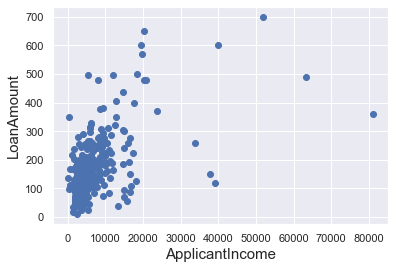

In [13]:
plt.scatter(cpdata.ApplicantIncome,cpdata.LoanAmount)
plt.xlabel('ApplicantIncome',fontsize=15)
plt.ylabel('LoanAmount',fontsize=15)
print("Correlation between ApplicantIncome and Loan Amount is:", round(cpdata.ApplicantIncome.corr(cpdata.LoanAmount), 1))

Text(0, 0.5, 'LoanAmountTerm')

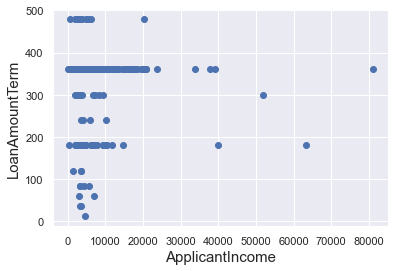

In [14]:
plt.scatter(cpdata.ApplicantIncome,cpdata.Loan_Amount_Term)
plt.xlabel('ApplicantIncome',fontsize=15)
plt.ylabel('LoanAmountTerm',fontsize=15)

In [15]:
dict1=dict(cpdata.groupby('Loan_Amount_Term')['LoanAmount'].median())
for i in dict1.keys():
    ind=cpdata[(cpdata['Loan_Amount_Term']==i) & (cpdata['LoanAmount'].isnull())].index
    _mode=cpdata[(cpdata['Loan_Amount_Term']==i)]['LoanAmount'].median()
    cpdata.loc[ind,'LoanAmount']=_mode
    print(i,ind,_mode)

12.0 Int64Index([], dtype='int64') 111.0
36.0 Int64Index([], dtype='int64') 117.5
60.0 Int64Index([], dtype='int64') 140.0
84.0 Int64Index([], dtype='int64') 126.0
120.0 Int64Index([], dtype='int64') 25.0
180.0 Int64Index([202, 605], dtype='int64') 123.0
240.0 Int64Index([435], dtype='int64') 100.0
300.0 Int64Index([], dtype='int64') 124.0
360.0 Int64Index([  0,  35,  63,  81,  95, 102, 103, 113, 127, 284, 305, 322, 338,
            387, 437, 479, 524, 550, 551],
           dtype='int64') 129.0
480.0 Int64Index([], dtype='int64') 113.0


In [16]:
for colname in ['Loan_Amount_Term']:
    ind=cpdata[cpdata[colname].isnull()].index  
    _median=cpdata[colname].median()
    cpdata.loc[ind,colname]=_median
    print(colname,_median,ind)

Loan_Amount_Term 360.0 Int64Index([19, 36, 44, 45, 73, 112, 165, 197, 223, 232, 335, 367, 421, 423], dtype='int64')


In [17]:
#Observation:
#Gender,Married,Depennts,Self_Employed to be filled with mode


In [18]:
mode_impute_cols = ['Gender','Married','Dependents','Self_Employed','Credit_History']
for col in mode_impute_cols:
    cpdata[col].fillna(cpdata[col].mode()[0], axis=0, inplace=True)

In [19]:
cpdata.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:xlabel='Married', ylabel='Self_Employed'>

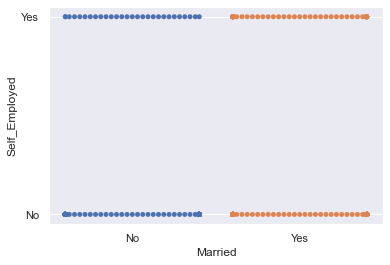

In [20]:
sns.swarmplot(x='Married', y="Self_Employed",data=cpdata)

<AxesSubplot:xlabel='Gender', ylabel='Self_Employed'>

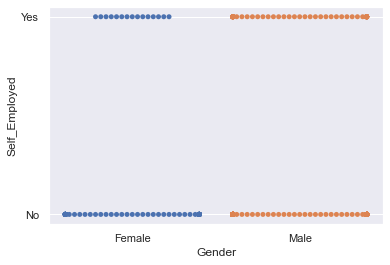

In [21]:
sns.swarmplot(x="Gender", y="Self_Employed",data=cpdata)

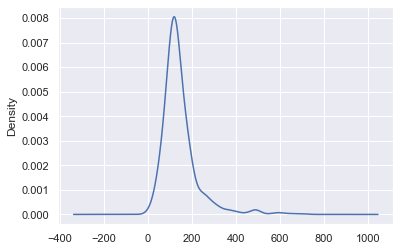

2.742476379728847


In [22]:
cpdata.LoanAmount.plot(kind='kde')
plt.show()
f=cpdata['LoanAmount'].skew()
print(f)

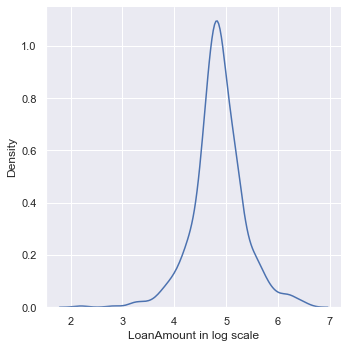

In [23]:
sns.displot(np.log(cpdata['LoanAmount']), kind='kde')
plt.xlabel('LoanAmount in log scale')
plt.show()

### Univariate analysis on int dtype

In [24]:
cpdata.select_dtypes(include=['int64','float64']).dtypes

ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
dtype: object

In [25]:
cpdata.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.721498,342.410423
std,6109.041673,2926.248369,84.122041,64.428629
min,150.000000,0.000000,9.000000,12.000000
25%,2877.500000,0.000000,100.000000,360.000000
50%,3812.500000,1188.500000,128.000000,360.000000
75%,5795.000000,2297.250000,164.750000,360.000000
max,81000.000000,41667.000000,700.000000,480.000000


In [26]:
def box_plot(df=cpdata):
    num_data = df.select_dtypes(include='number')
    num_cols_per_row = 5
    num_rows = int(np.ceil(len(num_data.columns)/num_cols_per_row))
    fig_num = 0
    plt.figure(figsize=(15,5))
    for col in num_data:
        fig_num += 1
        plt.subplot(num_rows, num_cols_per_row, fig_num)
        num_data[col].plot.box()
    plt.show()

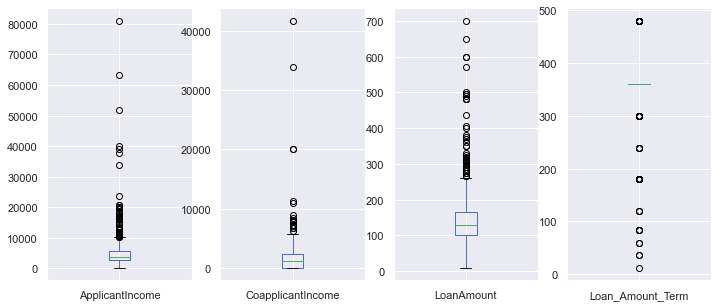

In [27]:
box_plot(cpdata)

### Removing Outliners

In [28]:
num_data = cpdata.select_dtypes(include='number')
lower_prcntle = 5
upper_prcntle = 100 - lower_prcntle
for num_col in num_data.columns:
    obs_within_lmts = cpdata[(cpdata[num_col] > cpdata[num_col].quantile(lower_prcntle/100)) & 
                              (cpdata[num_col] < cpdata[num_col].quantile(upper_prcntle/100))]
    print('There are {}% of observations between {}th percentile and {}th percentile for the column {}.'
          .format(round(100*obs_within_lmts.shape[0]/cpdata.shape[0], 2), lower_prcntle, upper_prcntle, num_col))

There are 89.74% of observations between 5th percentile and 95th percentile for the column ApplicantIncome.
There are 50.49% of observations between 5th percentile and 95th percentile for the column CoapplicantIncome.
There are 89.9% of observations between 5th percentile and 95th percentile for the column LoanAmount.
There are 2.77% of observations between 5th percentile and 95th percentile for the column Loan_Amount_Term.


In [29]:
# Outliners should be removed from Applicant Income and LoanAmount

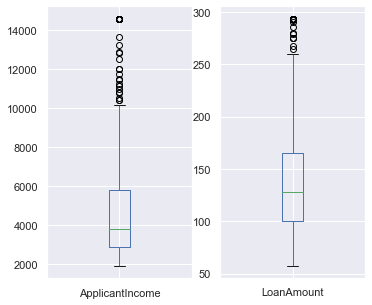

In [30]:
lower_prcntle=5
upper_prcntle=100-lower_prcntle
num_data = cpdata.select_dtypes(include='number')
num_data.drop(['CoapplicantIncome','Loan_Amount_Term'], axis=1, inplace=True)
treat_outliers = num_data.columns
def outliers(low, high, val):
    if val < low:
        return low
    elif val > high:
        return high
    else:
        return val

for num_col in treat_outliers:
    lower_prnctle_val = num_data[num_col].quantile(lower_prcntle/100)
    upper_prcntle_val = num_data[num_col].quantile(upper_prcntle/100)
    num_data[num_col] = num_data.apply(
        lambda row: outliers(lower_prnctle_val, upper_prcntle_val, row[num_col]),
        axis=1
    )
cpdata[num_data.columns] = num_data
box_plot(num_data)

### Univariate Analysis of Categorical DataType

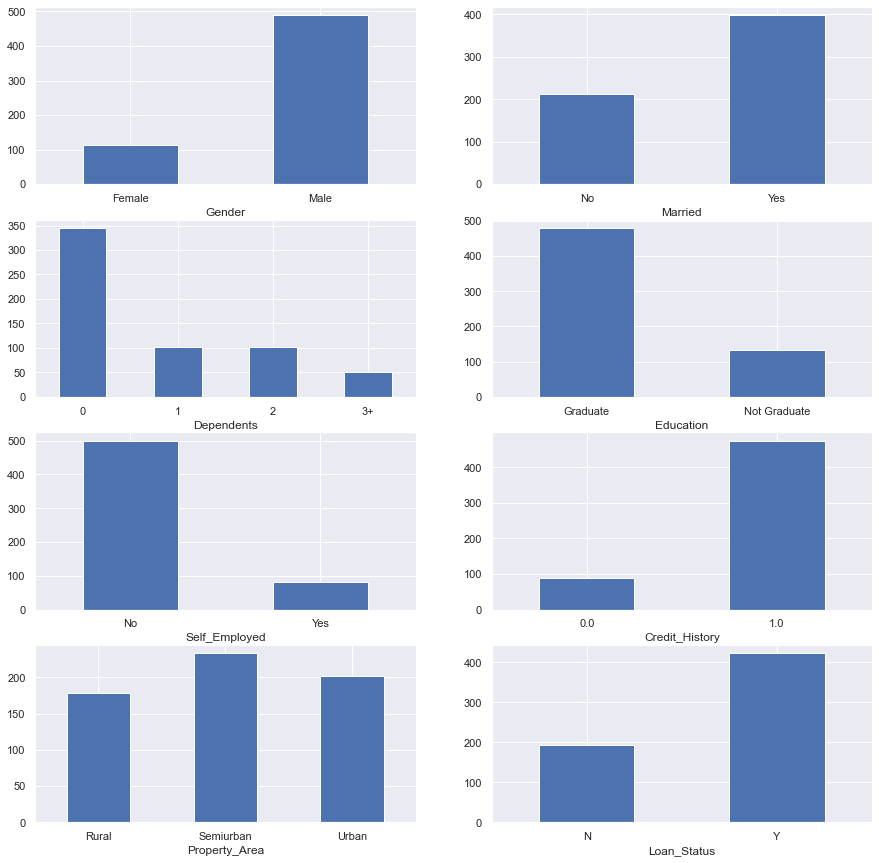

In [31]:
cat_cols = cpdata.select_dtypes(include=['category']).columns
num_cols_per_row = 2
num_rows = int(np.ceil(len(cat_cols)/num_cols_per_row))
fig_num = 0
plt.figure(figsize=(15,15))
for col in cat_cols:
    fig_num += 1
    plt.subplot(num_rows, num_cols_per_row, fig_num)
    data[col].value_counts().sort_index().plot.bar()
    plt.xlabel(col)
    plt.xticks(rotation=0)
plt.show()

In [32]:
#Summary
# For Dependents merge +3,2,1 into 1 and 0 as 0 for dummies

In [33]:
cpdata

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,129.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106.0,0.0,57.3,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y


In [34]:
numerical = cpdata.select_dtypes(include=['int64','float64'])[:]
numerical.dtypes

ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
dtype: object

#### Correlation Matrix

In [35]:
correlation = numerical.dropna().corr()
correlation

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
ApplicantIncome,1.000000,-0.154262,0.563469,-0.014828
CoapplicantIncome,-0.154262,1.000000,0.221429,-0.059383
LoanAmount,0.563469,0.221429,1.000000,0.050868
Loan_Amount_Term,-0.014828,-0.059383,0.050868,1.000000


In [36]:
#LoanAmount and Applicant Income are co related
#Remove dependents and try

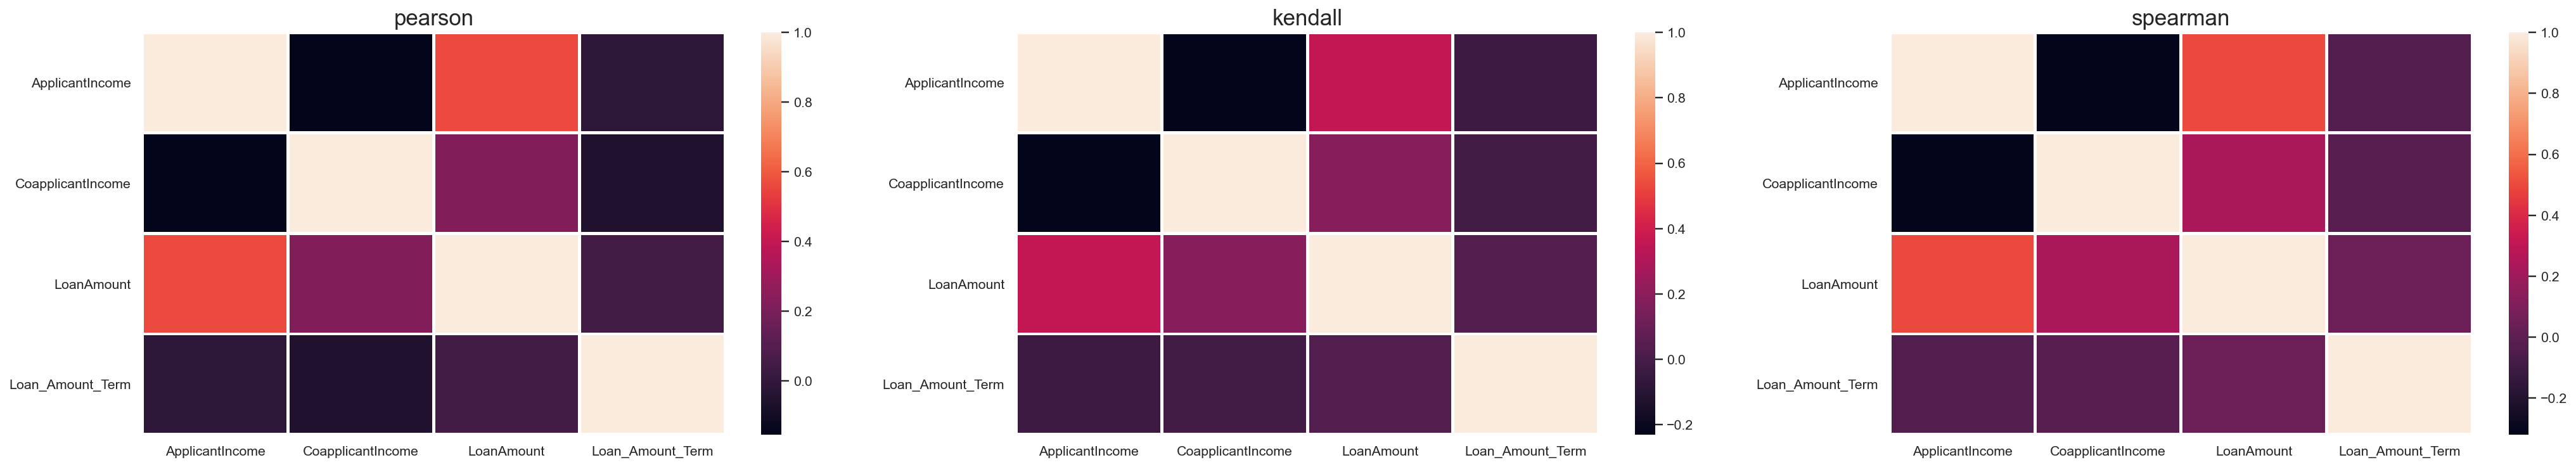

In [37]:
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)

#### SCATTER PLOT WITH APPLICANT INCOME AND OTHER NUMERICAL VARIABLES

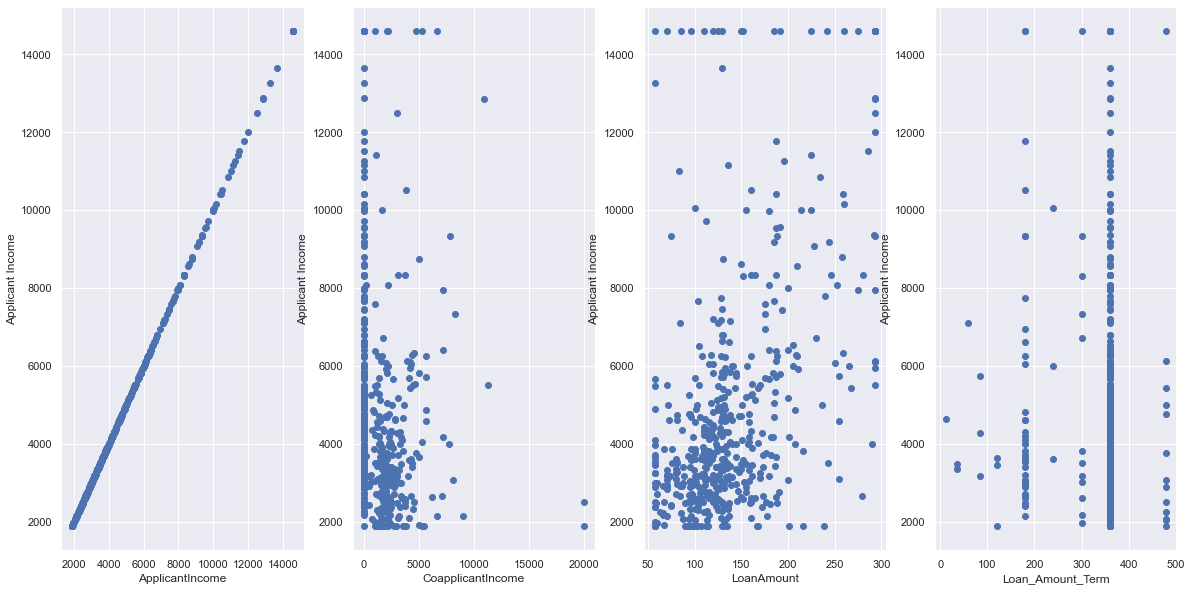

In [38]:
num_data = cpdata.select_dtypes(include='number').sample(500)
num_cols_per_row = 4
num_rows = int(np.ceil(len(num_data.columns)/num_cols_per_row))
fig_num = 0
plt.figure(figsize=(20,10))
for col in num_data:
    fig_num += 1
    plt.subplot(num_rows, num_cols_per_row, fig_num)
    plt.scatter(num_data[col], num_data['ApplicantIncome'])
    plt.xlabel(col)
    plt.ylabel('Applicant Income')
plt.show()

### Categorical and Categorical

In [39]:
def BVA_categorical_plot(data, tar, cat):
  '''
  take data and two categorical variables,
  calculates the chi2 significance between the two variables 
  and prints the result with countplot & CrossTab
  '''
  #isolating the variables
  data = data[[cat,tar]][:]

  #forming a crosstab
  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  #performing chi2 test
  from scipy.stats import chi2_contingency
  chi, p, dof, expected = chi2_contingency(f_obs)
  
  #checking whether results are significant
  if p<0.05:
    sig = True
  else:
    sig = False

  #plotting grouped plot
  sns.countplot(x=cat, hue=tar, data=data)
  plt.title("p-value = {}\n difference significant? = {}\n".format(round(p,8),sig))

  #plotting percent stacked bar plot
  #sns.catplot(ax, kind='stacked')
  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()

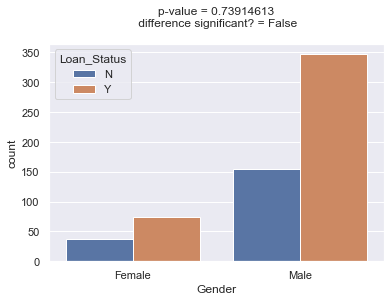

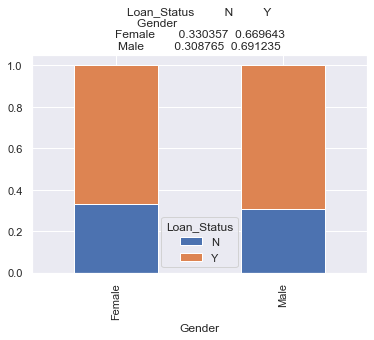

In [40]:
BVA_categorical_plot(cpdata,'Loan_Status','Gender')

##### No significant difference between male and female loan status rate
1.66% female loans are approved.
2.69% male loans are approved.

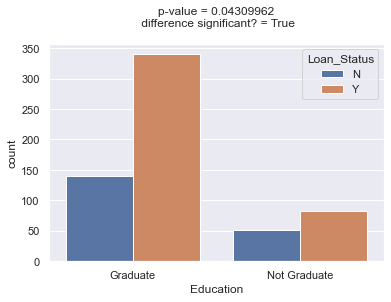

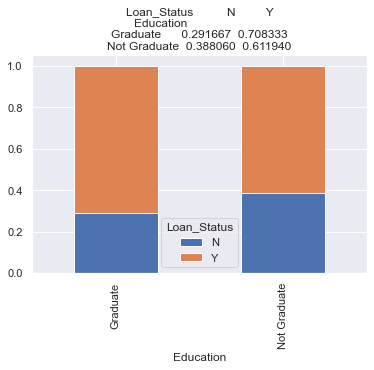

In [41]:
BVA_categorical_plot(cpdata,'Loan_Status','Education')

##### Education is a significant factor for loan status base model

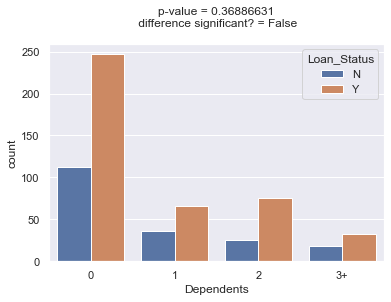

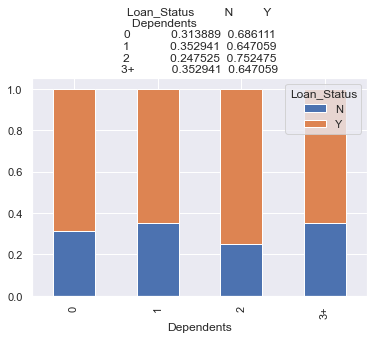

In [42]:
BVA_categorical_plot(cpdata,'Loan_Status','Dependents')

##### Result: Dependents also doesn't play any significant role

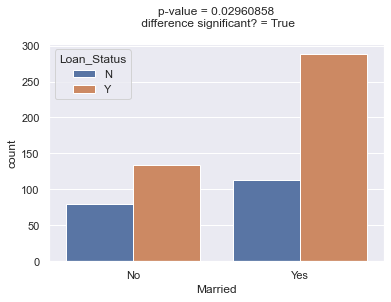

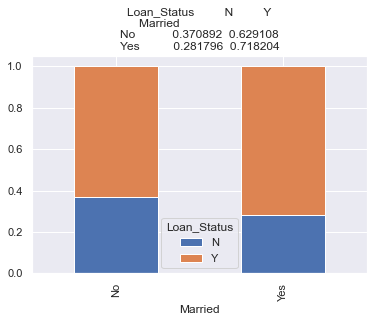

In [43]:
BVA_categorical_plot(cpdata,'Loan_Status','Married')

##### Married is also not significant

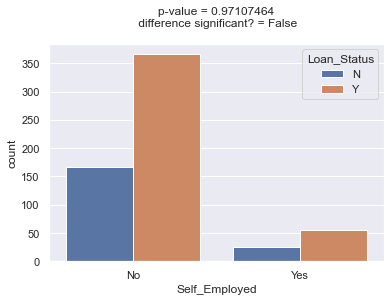

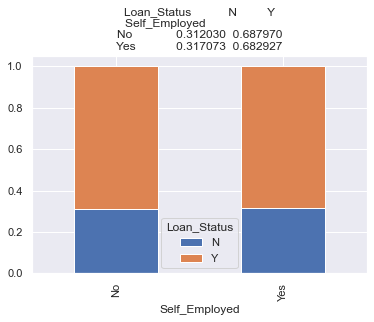

In [44]:
BVA_categorical_plot(cpdata,'Loan_Status','Self_Employed')

##### Self employed is insignificant

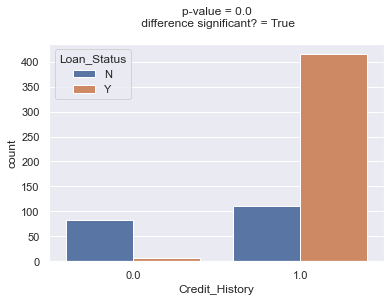

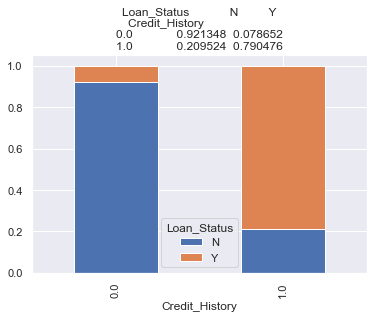

In [45]:
BVA_categorical_plot(cpdata,'Loan_Status','Credit_History')

##### Credit history plays a significant role for loan approval

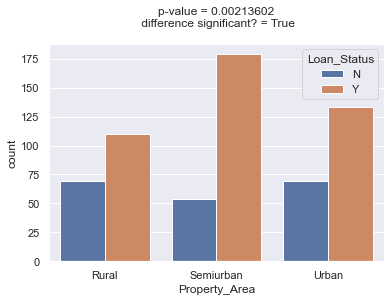

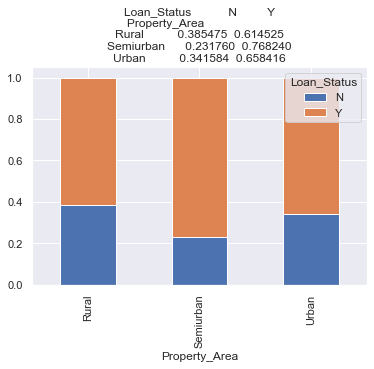

In [46]:
BVA_categorical_plot(cpdata,'Loan_Status','Property_Area')

##### Property area is significant

### Result

#### Mapping

In [47]:
cpdata['Self_Employed']=cpdata['Self_Employed'].map({'No':0,'Yes':1})
cpdata['Education']=cpdata['Education'].map({'Not Graduate':0,'Graduate':1})
cpdata['Property_Area']=cpdata['Property_Area'].map({'Rural':0,'Semiurban':1,'Urban':2})
cpdata['Loan_Status']=cpdata['Loan_Status'].map({'N':0,'Y':1})

#### Creating traindata and target variable 

In [48]:
traindata=cpdata.drop(['Loan_Status'],axis=1)
traindata=traindata.drop(['Married','Gender','Dependents'],axis=1)
target=cpdata.Loan_Status
traindata

,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,5849.0,0.0,129.0,360.0,1.0,2
1,1,0,4583.0,1508.0,128.0,360.0,1.0,0
2,1,1,3000.0,0.0,66.0,360.0,1.0,2
3,0,0,2583.0,2358.0,120.0,360.0,1.0,2
4,1,0,6000.0,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...
609,1,0,2900.0,0.0,71.0,360.0,1.0,0
610,1,0,4106.0,0.0,57.3,180.0,1.0,0
611,1,0,8072.0,240.0,253.0,360.0,1.0,2
612,1,0,7583.0,0.0,187.0,360.0,1.0,2


In [49]:
traindata = pd.get_dummies(traindata)

In [50]:
traindata.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Education_1,Education_0,Self_Employed_0,Self_Employed_1,Credit_History_0.0,Credit_History_1.0,Property_Area_0,Property_Area_1,Property_Area_2
0,5849.0,0.0,129.0,360.0,1,0,1,0,0,1,0,0,1
1,4583.0,1508.0,128.0,360.0,1,0,1,0,0,1,1,0,0
2,3000.0,0.0,66.0,360.0,1,0,0,1,0,1,0,0,1
3,2583.0,2358.0,120.0,360.0,0,1,1,0,0,1,0,0,1
4,6000.0,0.0,141.0,360.0,1,0,1,0,0,1,0,0,1


### Test Train Split

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train, x_test, y_train, y_test = train_test_split(traindata,target, train_size=0.8, random_state=42,stratify=target)

#### Scaling

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols_to_scale=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
x_train[cols_to_scale] = scaler.fit_transform(x_train[cols_to_scale])
x_test[cols_to_scale]=scaler.transform(x_test[cols_to_scale])

In [55]:
x_train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Education_1,Education_0,Self_Employed_0,Self_Employed_1,Credit_History_0.0,Credit_History_1.0,Property_Area_0,Property_Area_1,Property_Area_2
154,0.106930,0.000000,0.000000,0.743590,1,0,1,0,0,1,0,0,1
239,0.111738,0.000000,0.163914,0.743590,1,0,1,0,0,1,0,1,0
448,0.113709,0.041040,0.392630,0.743590,1,0,1,0,1,0,1,0,0
471,0.059552,0.036000,0.235917,0.358974,0,1,1,0,1,0,1,0,0
273,0.056951,0.053352,0.392630,0.743590,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,0.084621,0.066983,0.367217,0.743590,1,0,1,0,0,1,0,1,0
349,0.057345,0.149999,0.549343,0.743590,1,0,1,0,0,1,1,0,0
26,0.071062,0.054072,0.274036,0.743590,1,0,1,0,0,1,0,1,0
96,0.046230,0.055248,0.337569,0.743590,1,0,1,0,0,1,0,1,0


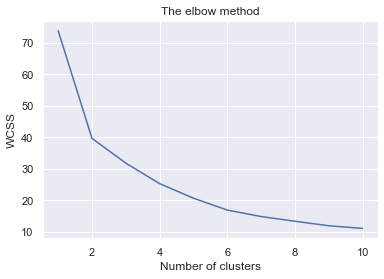

In [56]:
x = x_train.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [57]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [58]:
y_pred = classifier.predict(x_test)

In [59]:
classifier.score(x_test,y_test)

0.8048780487804879

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

parameters={
    'criterion':['gini', 'entropy'],
    'max_depth':[2,3,4,5,6],
    'min_samples_split':[10,15,20,30,40,80],
    'min_samples_leaf':[10,15,20,30,50,70],
}
DT = DecisionTreeClassifier()

gridsearch= GridSearchCV(estimator=DT, param_grid=parameters, scoring='neg_mean_squared_error', cv=5)

In [61]:
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [10, 15, 20, 30, 50, 70],
                         'min_samples_split': [10, 15, 20, 30, 40, 80]},
             scoring='neg_mean_squared_error')

In [62]:
gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 10,
 'min_samples_split': 10}

In [63]:
dtc=DecisionTreeClassifier(max_depth=4,min_samples_leaf=10,min_samples_split=80)

In [64]:
from sklearn.model_selection import RandomizedSearchCV
randomsearch = RandomizedSearchCV(estimator = DT,param_distributions=parameters, n_iter= 20, cv=5)

In [65]:
randomsearch.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5, 6],
                                        'min_samples_leaf': [10, 15, 20, 30, 50,
                                                             70],
                                        'min_samples_split': [10, 15, 20, 30,
                                                              40, 80]})

In [66]:
randomsearch.best_params_


{'min_samples_split': 40,
 'min_samples_leaf': 50,
 'max_depth': 3,
 'criterion': 'gini'}

In [67]:
DTC = DecisionTreeClassifier(max_depth=2,min_samples_leaf=10,min_samples_split=20)

In [68]:
DTC.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=10, min_samples_split=20)

In [69]:
DTC.score(x_test,y_test)


0.8536585365853658

### Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split as tts

In [71]:
rf = RandomForestClassifier(random_state=78)

In [72]:
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=78)

In [73]:
rf.score(x_train,y_train)

0.9979633401221996

In [74]:
parametersRF={
    'n_estimators':[int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
    'criterion':['gini','entropy'],
    'max_depth':[int(x) for x in np.linspace(10, 110, num = 11)],
    #'max_sample':[i/100 for i in range(1,100,2)],
    'min_samples_split':range(1,100,2),
    'min_samples_leaf':range(1,100,2),
    'max_features':['sqrt','log2',8,10,12],
    'n_jobs':[-1],
    'bootstrap':[True,False]
}

In [75]:
RF= RandomForestClassifier(n_estimators=150,max_features=12,max_depth=4,min_samples_leaf=10,min_samples_split=30,n_jobs=-1,random_state=78)

In [76]:
RF.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, max_features=12, min_samples_leaf=10,
                       min_samples_split=30, n_estimators=150, n_jobs=-1,
                       random_state=78)

In [77]:
RF.score(x_train,y_train)

0.7983706720977597

### TEST DATA

In [78]:
url1='https://datahack-prod.s3.amazonaws.com/test_file/test_lAUu6dG.csv'
testdata=pd.read_csv(url1)
testdata

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [79]:
ttdata=testdata.copy()

In [80]:
ttdata=ttdata.drop(['Loan_ID','Gender','Married','Dependents'],axis=1)

#### Missing Values and mapping

In [81]:
ttdata['Self_Employed']=ttdata['Self_Employed'].map({'No':0,'Yes':1})
ttdata['Education']=ttdata['Education'].map({'Not Graduate':0,'Graduate':1})
ttdata['Property_Area']=ttdata['Property_Area'].map({'Rural':0,'Semiurban':1,'Urban':2})


In [82]:
mode_impute_cols = ['Self_Employed','Credit_History']
for col in mode_impute_cols:
    ttdata[col].fillna(ttdata[col].mode()[0], axis=0, inplace=True)

In [83]:
for colname in ['Loan_Amount_Term']:
    ind=ttdata[ttdata[colname].isnull()].index  
    _median=ttdata[colname].median()
    ttdata.loc[ind,colname]=_median
    print(colname,_median,ind)

Loan_Amount_Term 360.0 Int64Index([45, 48, 117, 129, 184, 214], dtype='int64')


In [84]:
dict1=dict(ttdata.groupby('Loan_Amount_Term')['LoanAmount'].median())
for i in dict1.keys():
    ind=ttdata[(ttdata['Loan_Amount_Term']==i) & (ttdata['LoanAmount'].isnull())].index
    _mode=ttdata[(ttdata['Loan_Amount_Term']==i)]['LoanAmount'].median()
    ttdata.loc[ind,'LoanAmount']=_mode
    print(i,ind,_mode)

6.0 Int64Index([], dtype='int64') 95.0
12.0 Int64Index([], dtype='int64') 260.0
36.0 Int64Index([], dtype='int64') 118.0
60.0 Int64Index([], dtype='int64') 139.0
84.0 Int64Index([], dtype='int64') 104.0
120.0 Int64Index([], dtype='int64') 80.0
180.0 Int64Index([], dtype='int64') 101.0
240.0 Int64Index([], dtype='int64') 93.5
300.0 Int64Index([], dtype='int64') 137.0
350.0 Int64Index([], dtype='int64') 133.0
360.0 Int64Index([78, 188, 247, 289], dtype='int64') 126.0
480.0 Int64Index([101], dtype='int64') 108.0


In [85]:
ttdata.isna().sum()

Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

#### Get dummies and transformation

In [86]:
d1=['Education','Self_Employed','Credit_History','Property_Area']
ttdata[d1]=ttdata[d1].astype('category')

In [87]:
ttdata=pd.get_dummies(ttdata)

In [88]:
ttdata[cols_to_scale] = scaler.fit_transform(ttdata[cols_to_scale])

In [89]:
ttdata

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Education_0,Education_1,Self_Employed_0.0,Self_Employed_1.0,Credit_History_0.0,Credit_History_1.0,Property_Area_0,Property_Area_1,Property_Area_2
0,0.078865,0.000000,0.157088,0.746835,0,1,1,0,0,1,0,0,1
1,0.042411,0.062500,0.187739,0.746835,0,1,1,0,0,1,0,0,1
2,0.068938,0.075000,0.344828,0.746835,0,1,1,0,0,1,0,0,1
3,0.032263,0.106083,0.137931,0.746835,0,1,1,0,0,1,0,0,1
4,0.045168,0.000000,0.095785,0.746835,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0.055274,0.074042,0.162835,0.746835,1,0,0,1,0,1,0,0,1
363,0.057329,0.029542,0.166667,0.746835,0,1,1,0,0,1,0,0,1
364,0.044810,0.083042,0.187739,0.746835,0,1,1,0,0,1,0,1,0
365,0.068938,0.099708,0.249042,0.746835,0,1,1,0,0,1,1,0,0


In [90]:
ans=RF.predict(ttdata)

In [91]:
ans

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [92]:
submission = pd.DataFrame()
submission['Loan_ID'] = testdata['Loan_ID']
submission['Loan_Status'] = ans
submission.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [93]:
submission['Loan_Status']=submission['Loan_Status'].map({1:'Y',0:'N'})

In [94]:
submission

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [95]:
#submission.to_csv('submitLoan.csv', index = False)

1. Radom forest achese kerna hai
2. ensemble techniques
3. k fold
4. Decision Tree
5. XG Boost and ada boost, gradient boosting
6. 